In [1]:
#Dependencies
import yfinance as yf
import pandas as pd
import plotly.express as px
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st
import quandl
%matplotlib notebook
%matplotlib inline
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode(connected = True)
#Saving path to save the file that we are going to get from the api call from yahoo finance
output_stocks_unemployment = "output_data/stocksunemployment.csv"
output_unemployment = "output_data/unemployementdata.csv"

In [2]:
#Initialize the Api call assigning each Ticker name from yahoo finance to get the stock data
TSLA = yf.Ticker("TSLA")
TM = yf.Ticker("TM")
F = yf.Ticker("F")
GM = yf.Ticker("GM")
HMC = yf.Ticker("HMC")
DDAIF = yf.Ticker("DDAIF")
VWAGY = yf.Ticker("VWAGY")
FUJHY = yf.Ticker("FUJHY")
MZDAY = yf.Ticker("MZDAY")
DODGX = yf.Ticker("DODGX")

In [3]:
#Assigning each Ticker data to dataframes
tsla_historical = TSLA.history(start="2014-01-01", end="2021-07-28", interval="1mo")
tm_historical = TM.history(start="2014-01-01", end="2021-07-28", interval="1mo")
f_historical = F.history(start="2014-01-01", end="2021-07-28", interval="1mo")
gm_historical = GM.history(start="2014-01-01", end="2021-07-28", interval="1mo")
hmc_historical = HMC.history(start="2014-01-01", end="2021-07-28", interval="1mo")
ddaif_historical = DDAIF.history(start="2014-01-01", end="2021-07-28", interval="1mo")
vwagy_historical = VWAGY.history(start="2014-01-01", end="2021-07-28", interval="1mo")
fujhy_historical = FUJHY.history(start="2014-01-01", end="2021-07-28", interval="1mo")
mzday_historical = MZDAY.history(start="2014-01-01", end="2021-07-28", interval="1mo")
dodgx_historical = MZDAY.history(start="2014-01-01", end="2021-07-28", interval="1mo")

In [4]:
#Adding a Ticker Names for each stocks
f_historical["Ticker"]="F"
tm_historical["Ticker"]="TM" 
gm_historical["Ticker"]="GM"
hmc_historical["Ticker"]="HMC"
ddaif_historical["Ticker"]="DDAIF"
vwagy_historical["Ticker"]="VWAGY"
tsla_historical["Ticker"]="TSLA"
fujhy_historical["Ticker"]="FUJHY"
mzday_historical["Ticker"]="MZDAY"
dodgx_historical["Ticker"]="DODGX"

In [8]:
#Merging all the stock datas into one dataframe
merged_df = pd.concat([f_historical, tm_historical, gm_historical, hmc_historical, ddaif_historical, vwagy_historical,tsla_historical, fujhy_historical, mzday_historical, dodgx_historical ])
merged_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2014-01-01,10.930932,11.895009,10.562314,10.604847,1.003488e+09,0.000,0.0,F
2014-01-29,NaN,NaN,NaN,NaN,NaN,0.125,0.0,F
2014-02-01,10.718429,11.068564,10.289692,10.997108,7.126964e+08,0.000,0.0,F
2014-03-01,10.861347,11.311521,10.739871,11.147172,6.173546e+08,0.000,0.0,F
2014-04-01,11.197189,11.783130,11.097150,11.540178,6.641995e+08,0.000,0.0,F
...,...,...,...,...,...,...,...,...
2021-03-01,4.080000,4.370000,3.880000,4.090000,1.040600e+06,0.000,0.0,DODGX
2021-04-01,4.050000,4.200000,3.760000,3.850000,1.119900e+06,0.000,0.0,DODGX
2021-05-01,3.930000,4.390000,3.740000,4.350000,1.355700e+06,0.000,0.0,DODGX


In [9]:
#Drop all Nan values in the dataframe and reset the index 
stocks_df=merged_df.dropna()
stocks_df.reset_index()
#Writing our final cleaned dataframe as a csv file


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2014-01-01,10.930932,11.895009,10.562314,10.604847,1.003488e+09,0.0,0.0,F
1,2014-02-01,10.718429,11.068564,10.289692,10.997108,7.126964e+08,0.0,0.0,F
2,2014-03-01,10.861347,11.311521,10.739871,11.147172,6.173546e+08,0.0,0.0,F
3,2014-04-01,11.197189,11.783130,11.097150,11.540178,6.641995e+08,0.0,0.0,F
4,2014-05-01,11.630363,11.925623,11.111858,11.839206,5.049235e+08,0.0,0.0,F
...,...,...,...,...,...,...,...,...,...
905,2021-03-01,4.080000,4.370000,3.880000,4.090000,1.040600e+06,0.0,0.0,DODGX
906,2021-04-01,4.050000,4.200000,3.760000,3.850000,1.119900e+06,0.0,0.0,DODGX
907,2021-05-01,3.930000,4.390000,3.740000,4.350000,1.355700e+06,0.0,0.0,DODGX
908,2021-06-01,4.360000,4.900000,4.230000,4.660000,1.249000e+06,0.0,0.0,DODGX


##### Data Exploration and quality check

In [10]:
#Data Exploration and quality check 
stocks_df.reset_index().groupby('Ticker')['Date'].agg(['min', 'max', 'count'])


,min,max,count
Ticker,,,
DDAIF,2014-01-01,2021-07-01,91
DODGX,2014-01-01,2021-07-01,91
F,2014-01-01,2021-07-01,91
FUJHY,2014-01-01,2021-07-01,91
GM,2014-01-01,2021-07-01,91
HMC,2014-01-01,2021-07-01,91
MZDAY,2014-01-01,2021-07-01,91
TM,2014-01-01,2021-07-01,91
TSLA,2014-01-01,2021-07-01,91


In [11]:
#Checking if there is any missing data
stocks_df.reset_index().isnull().sum()


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticker          0
dtype: int64

##### Extracting only the columns that we require for further analysis from the main dataframe

In [12]:
#We are getting only columns that we actual require from the original dataframe and assigning it to a new dataframe 
#called New_df
New_df = stocks_df.reset_index()[['Date', 'Ticker', 'Close']]
# make columns names prettier
New_df.columns = ['Date', 'Ticker', 'Price']
New_df

,Date,Ticker,Price
0,2014-01-01,F,10.604847
1,2014-02-01,F,10.997108
2,2014-03-01,F,11.147172
3,2014-04-01,F,11.540178
4,2014-05-01,F,11.839206
...,...,...,...
905,2021-03-01,DODGX,4.090000
906,2021-04-01,DODGX,3.850000
907,2021-05-01,DODGX,4.350000
908,2021-06-01,DODGX,4.660000


##### Pivoting the data from long format to wide, moving the 'Ticker' values as columns

In [61]:
#Pivot rows to columns 
New_df1 = New_df.pivot_table(index=['Date'], columns='Ticker', values=['Price'])
# flatten columns multi-index, `date` will become the dataframe index
New_df1.columns = [col[1] for col in New_df1.columns.values]
New_df1

,DDAIF,DODGX,F,FUJHY,GM,HMC,MZDAY,TM,TSLA,VWAGY
Date,,,,,,,,,,
2014-01-01,60.677994,12.0325,10.604847,13.7075,27.886005,37.509998,12.0325,104.811813,36.282001,23.029680
2014-02-01,67.065140,12.0300,10.997108,13.4275,27.978752,36.049999,12.0300,105.305000,48.962002,24.232758
2014-03-01,68.785316,11.1250,11.147172,13.6000,26.603003,35.340000,11.1250,103.113052,41.689999,24.147163
2014-04-01,67.326439,11.3050,11.540178,13.1000,26.885984,33.299999,11.3050,100.839981,41.577999,25.421572
2014-05-01,71.331055,10.9000,11.839206,13.3250,26.963957,35.180000,10.9000,105.202087,41.554001,24.974579
...,...,...,...,...,...,...,...,...,...,...
2021-03-01,87.905998,4.0900,12.250000,10.0000,57.459999,30.200001,4.0900,156.059998,667.929993,35.660892
2021-04-01,87.051399,3.8500,11.540000,9.2800,57.220001,29.820000,3.8500,150.770004,709.440002,31.151705
2021-05-01,93.400002,4.3500,14.530000,9.8100,59.310001,31.260000,4.3500,165.979996,625.219971,35.528271


##### Calculating monthly returns of each stock of our dataset using Pandas built in function called pct_change 

In [62]:
# compute monthly returns using pandas pct_change(),Calculating the percentage change between current and prior elements 
monthly_returns = New_df1.pct_change()
# skip first row with NA 
monthly_returns = monthly_returns[1:]
monthly_returns

,DDAIF,DODGX,F,FUJHY,GM,HMC,MZDAY,TM,TSLA,VWAGY
Date,,,,,,,,,,
2014-02-01,0.105263,-0.000208,0.036989,-0.020427,0.003326,-0.038923,-0.000208,0.004705,0.349485,0.052240
2014-03-01,0.025649,-0.075229,0.013646,0.012847,-0.049171,-0.019695,-0.075229,-0.020815,-0.148523,-0.003532
2014-04-01,-0.021209,0.016180,0.035256,-0.036765,0.010637,-0.057725,0.016180,-0.022044,-0.002686,0.052777
2014-05-01,0.059481,-0.035825,0.025912,0.017176,0.002900,0.056456,-0.035825,0.043258,-0.000577,-0.017583
2014-06-01,-0.018707,0.081422,0.048662,0.044653,0.049740,-0.005401,0.081422,0.057908,0.155412,-0.012757
...,...,...,...,...,...,...,...,...,...,...
2021-03-01,0.114446,0.030227,0.047009,0.059322,0.119423,0.091435,0.030227,0.054958,-0.011207,0.550090
2021-04-01,-0.009722,-0.058680,-0.057959,-0.072000,-0.004177,-0.012583,-0.058680,-0.033897,0.062147,-0.126446
2021-05-01,0.072929,0.129870,0.259099,0.057112,0.036526,0.048290,0.129870,0.100882,-0.118713,0.140492


##### Calculating the cumulative monthly returns using the pandas built in function called cumprod function

In [63]:
#Computing the cumulative returns of the each stocks
cumulative_monthly_returns = (1 + monthly_returns).cumprod() - 1
cumulative_monthly_returns = cumulative_monthly_returns.reset_index()
cumulative_monthly_returns

,Date,DDAIF,DODGX,F,FUJHY,GM,HMC,MZDAY,TM,TSLA,VWAGY
0,2014-02-01,0.105263,-0.000208,0.036989,-0.020427,0.003326,-0.038923,-0.000208,0.004705,0.349485,0.052240
1,2014-03-01,0.133612,-0.075421,0.051139,-0.007842,-0.046009,-0.057851,-0.075421,-0.016208,0.149055,0.048524
2,2014-04-01,0.109569,-0.060461,0.088198,-0.044319,-0.035861,-0.112237,-0.060461,-0.037895,0.145968,0.103861
3,2014-05-01,0.175567,-0.094120,0.116396,-0.027904,-0.033065,-0.062117,-0.094120,0.003724,0.145306,0.084452
4,2014-06-01,0.153575,-0.020362,0.170722,0.015502,0.015030,-0.067182,-0.020362,0.061847,0.323301,0.070617
...,...,...,...,...,...,...,...,...,...,...,...
85,2021-03-01,0.448729,-0.660087,0.155132,-0.270472,1.060532,-0.194881,-0.660087,0.488954,17.409403,0.548475
86,2021-04-01,0.434645,-0.680033,0.088182,-0.322998,1.051925,-0.205012,-0.680033,0.438483,18.553497,0.352676
87,2021-05-01,0.539273,-0.638479,0.370128,-0.284333,1.126873,-0.166622,-0.638479,0.583600,16.232235,0.542717
88,2021-06-01,0.481592,-0.612716,0.401246,-0.278497,1.121853,-0.142095,-0.612716,0.668133,17.733807,0.402586


#### Last row of the above dataframe gives us the cumulative returns of the all stocks over the entire period from Jan1st2014 to July7th2021

In [64]:
#Showing the cumulative returns of all stocks in the given time period
cum_return_entire_period = cumulative_monthly_returns.iloc[:, 1:].tail(1)
cum_return_entire_period * 100

,DDAIF,DODGX,F,FUJHY,GM,HMC,MZDAY,TM,TSLA,VWAGY
89,47.318647,-59.443175,31.543622,-28.652202,103.82984,-14.422821,-59.443175,71.583709,1794.052103,41.580985


#### Using the python .melt function Melt columns to rows (wide format to long) 

In [65]:
#Reset the index of monthly_returns dataframe
monthly_returns = monthly_returns.reset_index()

In [66]:
#To make the analysis easier, reshaping the data back to long format using melt function
monthly_returns_melt = monthly_returns.melt(id_vars=['Date'], var_name='Ticker', value_name='monthly_returns')
# add one more column, showing the daily_return as percent
monthly_returns_melt['monthly_return_pct'] = monthly_returns_melt['monthly_returns'] * 100
monthly_returns_melt

,Date,Ticker,monthly_returns,monthly_return_pct
0,2014-02-01,DDAIF,0.105263,10.526297
1,2014-03-01,DDAIF,0.025649,2.564934
2,2014-04-01,DDAIF,-0.021209,-2.120914
3,2014-05-01,DDAIF,0.059481,5.948058
4,2014-06-01,DDAIF,-0.018707,-1.870730
...,...,...,...,...
895,2021-03-01,VWAGY,0.550090,55.008975
896,2021-04-01,VWAGY,-0.126446,-12.644629
897,2021-05-01,VWAGY,0.140492,14.049202
898,2021-06-01,VWAGY,-0.090834,-9.083373


### Fetching the unemployment rates data with an API call to Quandl

In [67]:
#Calling an API to get the unemployment information from quandl which is in units:Percentage
unemployement_day = quandl.get(["FRED/UNRATE", \
   ],\
    trim_start="2014-1-1", trim_end="2021-06-30", collapse = 'daily')
unemployement_day.columns = ['Unemployment']
unemployment=unemployement_day.reset_index()
unemployment

,Date,Unemployment
0,2014-01-01,6.6
1,2014-02-01,6.7
2,2014-03-01,6.7
3,2014-04-01,6.2
4,2014-05-01,6.3
...,...,...
85,2021-02-01,6.2
86,2021-03-01,6.0
87,2021-04-01,6.1
88,2021-05-01,5.8


In [68]:
#Writing our unemployment dataframe as a csv file
unemployment.to_csv(output_unemployment, encoding= "utf-8", index = True, header= True)

In [69]:
#Set the unemployment dataframes Date as index
unemployment.set_index('Date')

,Unemployment
Date,
2014-01-01,6.6
2014-02-01,6.7
2014-03-01,6.7
2014-04-01,6.2
2014-05-01,6.3
...,...
2021-02-01,6.2
2021-03-01,6.0
2021-04-01,6.1


In [70]:
#Convert the date format to datetime so it is easy to merge with the stocks dataframe.
unemployment['Date']= pd.to_datetime(unemployment['Date'])


In [71]:
unemployment

,Date,Unemployment
0,2014-01-01,6.6
1,2014-02-01,6.7
2,2014-03-01,6.7
3,2014-04-01,6.2
4,2014-05-01,6.3
...,...,...
85,2021-02-01,6.2
86,2021-03-01,6.0
87,2021-04-01,6.1
88,2021-05-01,5.8


In [72]:
#Merging the unemployment dataframe with the stocks data for visualization on how the unemployment affects the car stocks prices
st_monret_unemp=pd.merge(monthly_returns_melt.reset_index(), unemployment, on = 'Date' )

In [73]:
st_monret_unemp

,index,Date,Ticker,monthly_returns,monthly_return_pct,Unemployment
0,0,2014-02-01,DDAIF,0.105263,10.526297,6.7
1,90,2014-02-01,DODGX,-0.000208,-0.020782,6.7
2,180,2014-02-01,F,0.036989,3.698889,6.7
3,270,2014-02-01,FUJHY,-0.020427,-2.042682,6.7
4,360,2014-02-01,GM,0.003326,0.332592,6.7
...,...,...,...,...,...,...
885,538,2021-06-01,HMC,0.029431,2.943058,5.9
886,628,2021-06-01,MZDAY,0.071264,7.126436,5.9
887,718,2021-06-01,TM,0.053380,5.337993,5.9
888,808,2021-06-01,TSLA,0.087137,8.713740,5.9


#### Merging the Totalcarsales sold across the country over year from 2014 to 2021 csv file with the above dataframe for further analysis to see if there is any correlation between car sales and Unemployment 

In [74]:
#Reading the Total car sales from the output_data folder
Totalcarsales = "output_data/US_car_sales_20142021.csv"
car_sales = pd.read_csv(Totalcarsales , low_memory=False, skiprows = [1])
#Converting the car_sales data frame to datatime format to merge with the st_monret_unemp dataframe
car_sales['Date']=pd.to_datetime(unemployment['Date'])


In [75]:
#Merging the total car sales to st_monret_unemp dataframe
st_monret_unemp_carsales=pd.merge(st_monret_unemp, car_sales, on= 'Date')
st_monret_unemp_carsales

,index,Date,Ticker,monthly_returns,monthly_return_pct,Unemployment,Car sales
0,0,2014-02-01,DDAIF,0.105263,10.526297,6.7,1186038
1,90,2014-02-01,DODGX,-0.000208,-0.020782,6.7,1186038
2,180,2014-02-01,F,0.036989,3.698889,6.7,1186038
3,270,2014-02-01,FUJHY,-0.020427,-2.042682,6.7,1186038
4,360,2014-02-01,GM,0.003326,0.332592,6.7,1186038
...,...,...,...,...,...,...,...
885,538,2021-06-01,HMC,0.029431,2.943058,5.9,1352285
886,628,2021-06-01,MZDAY,0.071264,7.126436,5.9,1352285
887,718,2021-06-01,TM,0.053380,5.337993,5.9,1352285
888,808,2021-06-01,TSLA,0.087137,8.713740,5.9,1352285


In [76]:
#Adding a new column to the above dataframe to calculate the car sales percentage
st_monret_unemp_carsales['Car sales percentage'] = (st_monret_unemp_carsales['Car sales'] / st_monret_unemp_carsales['Car sales'].sum())* 100
st_monret_unemp_carsales.round(3)

,index,Date,Ticker,monthly_returns,monthly_return_pct,Unemployment,Car sales,Car sales percentage
0,0,2014-02-01,DDAIF,0.105,10.526,6.7,1186038,0.095
1,90,2014-02-01,DODGX,-0.000,-0.021,6.7,1186038,0.095
2,180,2014-02-01,F,0.037,3.699,6.7,1186038,0.095
3,270,2014-02-01,FUJHY,-0.020,-2.043,6.7,1186038,0.095
4,360,2014-02-01,GM,0.003,0.333,6.7,1186038,0.095
...,...,...,...,...,...,...,...,...
885,538,2021-06-01,HMC,0.029,2.943,5.9,1352285,0.108
886,628,2021-06-01,MZDAY,0.071,7.126,5.9,1352285,0.108
887,718,2021-06-01,TM,0.053,5.338,5.9,1352285,0.108
888,808,2021-06-01,TSLA,0.087,8.714,5.9,1352285,0.108


#### Plotting the overall car sales across the country over years 

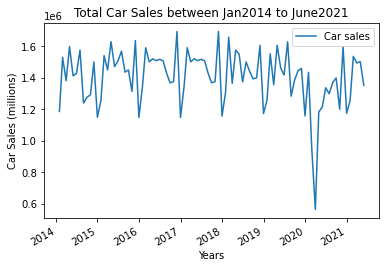

In [77]:
#Plotting the total cars sold in the timeframe of 2014 to 2021 across the country
st_monret_unemp_carsales.plot.line(x='Date', y = 'Car sales')
plt.xlabel('Years')
plt.ylabel('Car Sales (millions)')
plt.title('Total Car Sales between Jan2014 to June2021')
plt.savefig("output_data/unemployment_visuals/Fig1.png")
plt.show()

#### Observation: Above plot shows the total car sales across the nation over years. Car sales have been steady right from the beginning and rose right after the covid in 2020 and has normalized in the recent months. 

### Plotting a graph to show the Unemployment vs overall car sales across the country

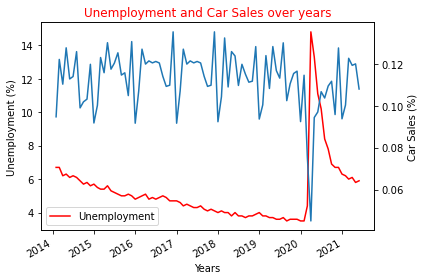

In [78]:
#plotting a twin axis plot using matplotlib to show the graph of both unemployment and overall car sales across the country over years
ax=st_monret_unemp_carsales.plot(kind='line', x='Date', y='Unemployment', color='Red')
ax2=st_monret_unemp_carsales.plot(kind='line', x='Date', y='Car sales percentage', secondary_y=True, ax=ax)
ax.set_xlabel("Years") 
ax.set_ylabel('Unemployment (%)')
ax2.set_ylabel('Car Sales (%)')
ax.legend(loc = 3)
plt.title('Unemployment and Car Sales over years', color = 'r')
plt.savefig("output_data/unemployment_visuals/Fig2.png")
plt.tight_layout()
plt.show()

#### Observation: We see a dip in the car sales when the unemployment was at peak during covid times in 2020 and rose to increase slowly right after the is again steady in the recent months.

### Calculating Correalation and Linear Regression  for Unemployment vs total car sales in the given years

R Squared value is: 0.2006718270689163
R Linear Regression is: y = -61.47x + 12.14


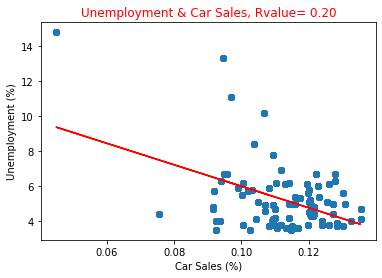

In [79]:
#Checking if there is any correlation between Monthly returns of all the stocks and Unemployment 
x_values = st_monret_unemp_carsales['Car sales percentage']
y_values = st_monret_unemp_carsales['Unemployment']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Car Sales (%)')
plt.ylabel('Unemployment (%)')
plt.title(f'Unemployment & Car Sales, Rvalue= 0.20', color = 'r')
print(f"\033[1mR Squared value is:\033[1m {rvalue**2}" )
print(f"\033[1mR Linear Regression is:\033[1m {line_eq}" )
plt.savefig("output_data/unemployment_visuals/Fig3.png")
plt.show()

#### Observation: Above plot shows a correlation of 0.20 between Car sales and Unemployment rates. With R value being so low, it shows that even car sales in not affected by Unemployment. Car sales are not driven by the unemployment rates.

In [80]:
#Plotting Unemployment change over years using Pandas plotly line plot
import plotly.graph_objects as go
fig = px.line(st_monret_unemp, x='Date',
              y='Unemployment', 
              title='Unemployment (%) change from 2014 to 2021',
              labels={'Unemployment':'Unemployment rates (%)', 'Date':'Years'})
fig.write_image("output_data/unemployment_visuals/Fig4.png")

fig.show()


### Plotting the same with Matplotlib

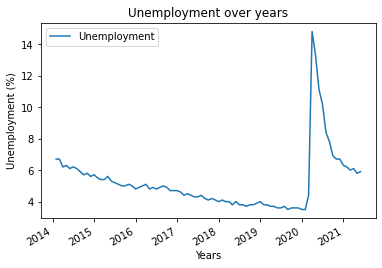

In [81]:
st_monret_unemp.plot.line(x='Date', y = 'Unemployment')
plt.xlabel('Years')
plt.title('Unemployment over years')
plt.ylabel('Unemployment (%)')
plt.savefig("output_data/unemployment_visuals/Fig5.png")
plt.show()


#### Observation: Above plot shows unemployment by itself how it has changed over years. We can see a peak of unemployment in 2020 and gradually normalizing in the recent months.

In [82]:
#Using melt yet again to bring the cumulative_monthly_returns to a long format for plotting 
cumulativedataframe = cumulative_monthly_returns.melt(id_vars=['Date'], var_name='Ticker', value_name='cum_return')
#Adding a column for showing the cumulative returns in percentages
cumulativedataframe['cum_return_pct'] = cumulativedataframe['cum_return'] * 100
#cumulativedataframe


In [83]:
#Again merging unemployment dataframe with the above one to see a better visualization of unemployment over cumulative returns
cumulativewithunemployment = pd.merge(cumulativedataframe, unemployment, on = 'Date')
cumulativewithunemployment

,Date,Ticker,cum_return,cum_return_pct,Unemployment
0,2014-02-01,DDAIF,0.105263,10.526297,6.7
1,2014-02-01,DODGX,-0.000208,-0.020782,6.7
2,2014-02-01,F,0.036989,3.698889,6.7
3,2014-02-01,FUJHY,-0.020427,-2.042682,6.7
4,2014-02-01,GM,0.003326,0.332592,6.7
...,...,...,...,...,...
885,2021-06-01,HMC,-0.142095,-14.209539,5.9
886,2021-06-01,MZDAY,-0.612716,-61.271558,5.9
887,2021-06-01,TM,0.668133,66.813254,5.9
888,2021-06-01,TSLA,17.733807,1773.380696,5.9


In [84]:
cumulativewithunemployment_melt = cumulativewithunemployment.melt(id_vars=['Date', 'Ticker'], value_vars=['cum_return', 'Unemployment'])
cumulativewithunemployment_melt

,Date,Ticker,variable,value
0,2014-02-01,DDAIF,cum_return,0.105263
1,2014-02-01,DODGX,cum_return,-0.000208
2,2014-02-01,F,cum_return,0.036989
3,2014-02-01,FUJHY,cum_return,-0.020427
4,2014-02-01,GM,cum_return,0.003326
...,...,...,...,...
1775,2021-06-01,HMC,Unemployment,5.900000
1776,2021-06-01,MZDAY,Unemployment,5.900000
1777,2021-06-01,TM,Unemployment,5.900000
1778,2021-06-01,TSLA,Unemployment,5.900000


### Showing if Unemployment affects the monthly cumulative returns of car stocks

In [85]:
import plotly.graph_objects as go
fig = px.line(cumulativewithunemployment_melt, x='Date',
              y='value', color='variable',
              title='Monthly Cumulative Returns of stocks and Unemployment',
              labels={'value':'Monthly cumulative returns (%)', 'Date':'Years'})
fig.write_image("output_data/unemployment_visuals/Fig6.png")
fig.show()

#### Observation: From the above plot we can see that the cumulative returns of car stocks and unemployment .Raising unemployment rate had no sign of affecting the car stocks


### Same plot with matplotlib

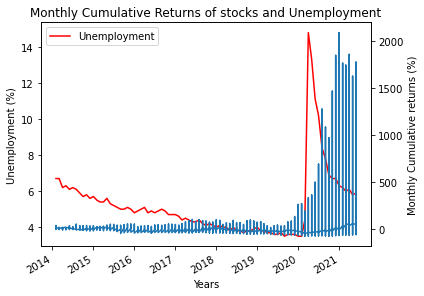

In [86]:
#plotting a twin axis plot using matplotlib to show the graph of both unemployment and overall car sales across the country over years
ax=cumulativewithunemployment.plot(kind='line', x='Date', y='Unemployment', color='Red')
ax2=cumulativewithunemployment.plot(kind='line', x='Date', y='cum_return_pct', secondary_y=True, ax=ax)
ax.set_xlabel("Years")
ax.set_ylabel('Unemployment (%)')
ax2.set_ylabel('Monthly Cumulative returns (%)')
ax.legend(loc=2)
plt.tight_layout()
plt.title('Monthly Cumulative Returns of stocks and Unemployment')
plt.savefig("output_data/unemployment_visuals/Fig7.png")
plt.show()



#### Observation: Above Plot shows the Monthly cumulative returns of car stocks and Unemployment 

In [87]:
#Plot that shows the cumulative monthly returns (%) of all the car stocks 
import plotly.graph_objects as go
fig = px.line(cumulativewithunemployment, x='Date',
              y='cum_return_pct', color='Ticker',
              title='Performance - Monthly Cumulative Returns',
              labels={'cum_return_pct':'Monthly cumulative returns of stocks (%)', 'Date':'Years'})
fig.write_image("output_data/unemployment_visuals/Fig8.png")
fig.show()

#### Analysis: Above plot shows the monthly cumulative returns of all stocks over years. Other than Tesla , all other stocks seems to show a consistent growth.

In [88]:
#Plotly multiple line plot shows the Unemployment and Monthly return percentages of all stocks  
import plotly.graph_objects as go
fig = px.line(st_monret_unemp, x='Date',
              y=['Unemployment', 'monthly_return_pct'],
              title='Unemployment and car stocks',
              labels={'value':'Monthly returns of stocks (%)', 'Date':'Years'})
fig.write_image("output_data/unemployment_visuals/Fig9.png")
fig.show()

#### Analysis: Monthly returns of car stock prices shows a better picture than the cumulative returns. From the above plot, we can see that unemployment has no effect on monthly returns of car stocks.  Auto market stocks are not affected due to unemployment. 


### Correalation and Linear Regression  for Unemployment vs Monthly returns of all car stocks

R Squared value is: 0.047481643583293834
R Linear Regression is: y = 0.04x + 5.2


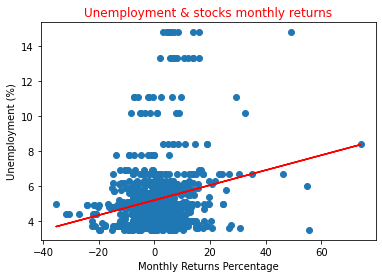

In [89]:
#Checking if there is any correlation between Monthly returns of all the stocks and Unemployment 
x_values = st_monret_unemp['monthly_return_pct']
y_values = st_monret_unemp['Unemployment']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.title('Unemployment & stocks monthly returns', color = 'r')
plt.xlabel('Monthly Returns Percentage')
plt.ylabel('Unemployment (%)')
print(f"\033[1mR Squared value is:\033[1m {rvalue**2}" )
print(f"\033[1mR Linear Regression is:\033[1m {line_eq}" )
plt.savefig("output_data/unemployment_visuals/Fig10.png")
plt.show()

R Squared value is:'0.047481643583293834'
R Linear Regression is:'y = 0.04x + 5.2'


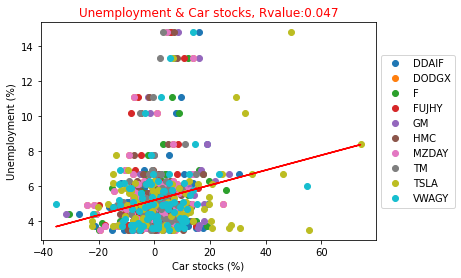

In [90]:
groups = st_monret_unemp.groupby("Ticker")
for name, group in groups:
    plt.plot(group["monthly_return_pct"], group["Unemployment"], marker="o", linestyle="", label=name)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Car stocks (%)')
plt.ylabel('Unemployment (%)')
plt.title(f'Unemployment & Car stocks, Rvalue:{round(rvalue**2,3)}', color = 'r')
print(f"\033[1mR Squared value is:\033[91m'{rvalue**2}'\033[0m" )
print(f"\033[1mR Linear Regression is:\033[91m'{line_eq}'\033[0m" )
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.savefig("output_data/unemployment_visuals/Fig11.png")
plt.show()


#### Observation:  Above plot shows the correlation value of Unemployment (%) vs Monthly returns of the car stocks (%) is 0.047.  Unemployment and car stocks have no correlation. Car stock market is not affected by the unemployment rates across the country. 

________________________________________________________________________________________________________________________________
### Conclusion: Based on all the statistical analysis on the stock prices and all the data presented in the above graphs, I have come to the conclusion that the unemployment rate across the country is neither affecting the auto market nor affecting the overall car sales in the US. 
________________________________________________________________________________________________________________________________
